In [5]:
from imports import *


In [6]:
# Đọc dữ liệu đã phân cụm
file_path = r'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\phantichpython\Group_Assign_Final\Cluster\all_clusters.csv'
df = pd.read_csv(file_path)

In [7]:
# Lấy danh sách cụm
clusters = df['Cluster'].unique()

# Hàm thực hiện ANOVA
def run_anova(df, column):
    groups = [df[df['Cluster'] == cluster][column] for cluster in clusters]
    f_stat, p_val = f_oneway(*groups)
    print(f"ANOVA cho '{column}':")
    print(f"  - F-statistic: {f_stat:.4f}")
    print(f"  - P-value: {p_val:.4f}")
    if p_val < 0.05:
        print(f"  => Có sự khác biệt đáng kể giữa các cụm về '{column}'\n")
    else:
        print(f"  => KHÔNG có sự khác biệt đáng kể giữa các cụm về '{column}'\n")

# Kiểm định cho từng cột RFM
run_anova(df, 'Recency')
run_anova(df, 'Frequency')
run_anova(df, 'Monetary')

ANOVA cho 'Recency':
  - F-statistic: 6499.0119
  - P-value: 0.0000
  => Có sự khác biệt đáng kể giữa các cụm về 'Recency'

ANOVA cho 'Frequency':
  - F-statistic: 2806.3471
  - P-value: 0.0000
  => Có sự khác biệt đáng kể giữa các cụm về 'Frequency'

ANOVA cho 'Monetary':
  - F-statistic: 3328.6069
  - P-value: 0.0000
  => Có sự khác biệt đáng kể giữa các cụm về 'Monetary'



# 2. Trực quan hóa để nhìn thấy sự rõ ràng

C:\Users\MIENTRUNG CPT\AppData\Local\Temp\ipykernel_21120\592176218.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Recency', data=df, palette='Set2')
C:\Users\MIENTRUNG CPT\AppData\Local\Temp\ipykernel_21120\592176218.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Frequency', data=df, palette='Set2')
C:\Users\MIENTRUNG CPT\AppData\Local\Temp\ipykernel_21120\592176218.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Monetary', data=df, palette='Set2')


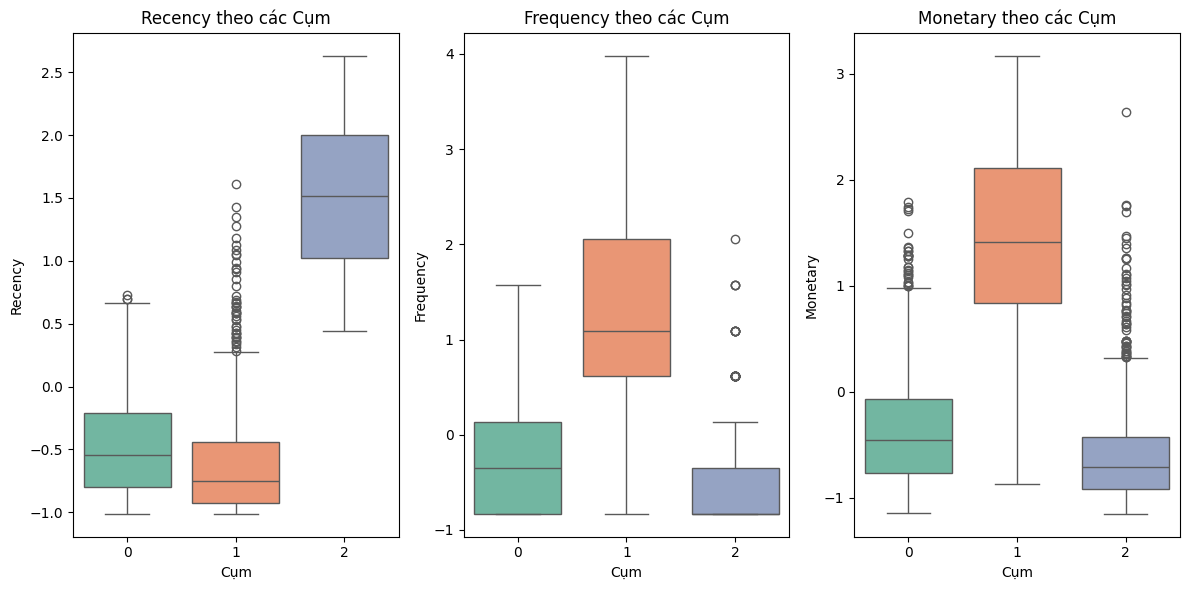

In [8]:
# Thiết lập kích thước của các biểu đồ con
plt.figure(figsize=(12, 6))

# Tạo các biểu đồ boxplot cho từng cột RFM trong các subplot khác nhau
plt.subplot(1, 3, 1)  # 1 hàng, 3 cột, chọn vị trí 1
sns.boxplot(x='Cluster', y='Recency', data=df, palette='Set2')
plt.title('Recency theo các Cụm')
plt.xlabel('Cụm')
plt.ylabel('Recency')

plt.subplot(1, 3, 2)  # 1 hàng, 3 cột, chọn vị trí 2
sns.boxplot(x='Cluster', y='Frequency', data=df, palette='Set2')
plt.title('Frequency theo các Cụm')
plt.xlabel('Cụm')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)  # 1 hàng, 3 cột, chọn vị trí 3
sns.boxplot(x='Cluster', y='Monetary', data=df, palette='Set2')
plt.title('Monetary theo các Cụm')
plt.xlabel('Cụm')
plt.ylabel('Monetary')

# Hiển thị toàn bộ biểu đồ
plt.tight_layout()
plt.show()

# 3. Kiểm tra chuyên sâu


ANOVA cho 'Recency':
  - F-statistic: 6499.0119
  - P-value: 0.0000
  => Có sự khác biệt đáng kể giữa các cụm về 'Recency'


=== POST-HOC TUKEY HSD cho 'Recency' ===
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -0.1384   0.0 -0.1842 -0.0927   True
     0      2   1.9939   0.0  1.9497  2.0381   True
     1      2   2.1323   0.0  2.0796   2.185   True
---------------------------------------------------


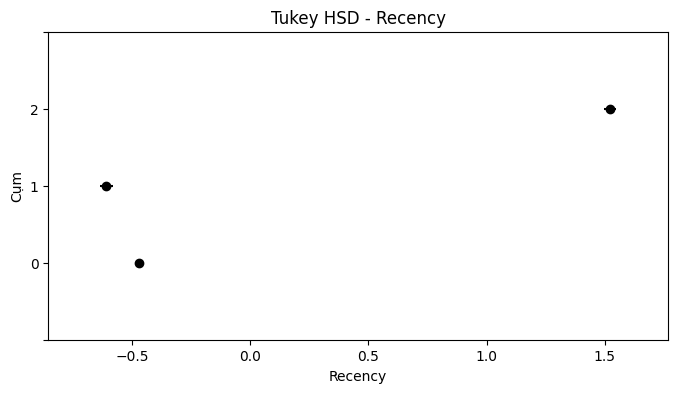


ANOVA cho 'Frequency':
  - F-statistic: 2806.3471
  - P-value: 0.0000
  => Có sự khác biệt đáng kể giữa các cụm về 'Frequency'


=== POST-HOC TUKEY HSD cho 'Frequency' ===
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   1.7609   0.0  1.6995  1.8223   True
     0      2  -0.2586   0.0  -0.318 -0.1993   True
     1      2  -2.0196   0.0 -2.0903 -1.9489   True
---------------------------------------------------


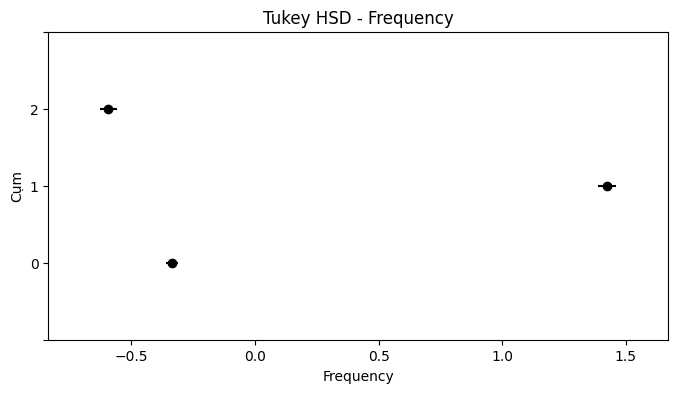


ANOVA cho 'Monetary':
  - F-statistic: 3328.6069
  - P-value: 0.0000
  => Có sự khác biệt đáng kể giữa các cụm về 'Monetary'


=== POST-HOC TUKEY HSD cho 'Monetary' ===
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   1.8393   0.0  1.7811  1.8975   True
     0      2  -0.2185   0.0 -0.2747 -0.1623   True
     1      2  -2.0578   0.0 -2.1248 -1.9908   True
---------------------------------------------------


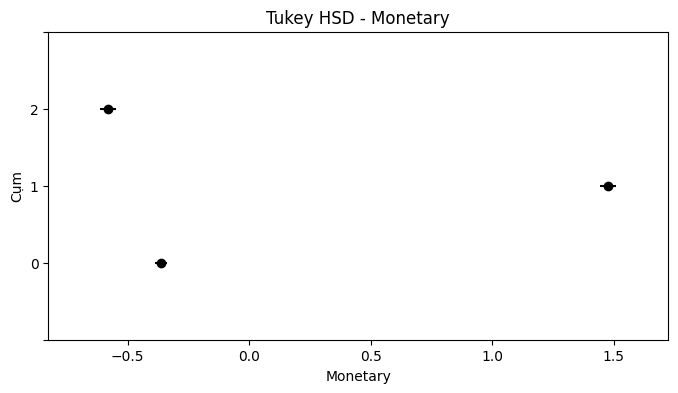

In [10]:
def posthoc_tukey(df, column):
    print(f"\n=== POST-HOC TUKEY HSD cho '{column}' ===")
    
    # Thực hiện Tukey HSD
    tukey = pairwise_tukeyhsd(endog=df[column],
                              groups=df['Cluster'],
                              alpha=0.05)
    
    print(tukey)
    tukey.plot_simultaneous(figsize=(8, 4), xlabel=column, ylabel="Cụm")
    plt.title(f"Tukey HSD - {column}")
    plt.show()

def run_anova_with_posthoc(df, column):
    groups = [df[df['Cluster'] == cluster][column] for cluster in clusters]
    f_stat, p_val = f_oneway(*groups)
    print(f"\nANOVA cho '{column}':")
    print(f"  - F-statistic: {f_stat:.4f}")
    print(f"  - P-value: {p_val:.4f}")
    if p_val < 0.05:
        print(f"  => Có sự khác biệt đáng kể giữa các cụm về '{column}'\n")
        posthoc_tukey(df, column)
    else:
        print(f"  => KHÔNG có sự khác biệt đáng kể giữa các cụm về '{column}'\n")
        
run_anova_with_posthoc(df, 'Recency')
run_anova_with_posthoc(df, 'Frequency')
run_anova_with_posthoc(df, 'Monetary')

